# Market Segmentation Case Study: McDonalds Fast Food Dataset

### Exploring Data

In [126]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install bioinfokit
!pip install biokit
from biokit import corrplot
from bioinfokit.visuz import cluster

In [127]:
df=pd.read_csv('/content/mcdonalds.csv')
df.shape

(1453, 15)

In [128]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [129]:
matrix_verbal=df.iloc[:,0:11].values
matrix_verbal

array([['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'],
       ...,
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
       ['No', 'Yes', 'No', ..., 'Yes', 'No', 'Yes']], dtype=object)

In [130]:
#converting the verbal values to boolean numeric values
matrix_num = (matrix_verbal == "Yes").astype(int)
print(matrix_num)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


In [131]:
col_means = np.round(matrix_num.mean(axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


### Principal Component Analysis

In [132]:
from sklearn import preprocessing
pca = PCA()
pca_data=preprocessing.scale(matrix_num)
pc=pca.fit_transform(matrix_num)
names=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
pc_df=pd.DataFrame(data=pc,columns=names)
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [133]:
from sklearn.decomposition import PCA

explained_variance = pca.explained_variance_ratio_
std_devs = np.sqrt(pca.explained_variance_)
cumulative_variance = explained_variance.cumsum()

print("Standard deviation:")
for i in range(len(std_devs)):
    print(f"PC{i+1}: {std_devs[i]}")

print("\nProportion of Variance:")
for i in range(len(explained_variance)):
    print(f"PC{i+1}: {explained_variance[i]}")

print("\nCumulative Proportion:")
for i in range(len(cumulative_variance)):
    print(f"PC{i+1}: {cumulative_variance[i]}")

Standard deviation:
PC1: 0.7570495217629871
PC2: 0.6074555644835014
PC3: 0.5046194562131088
PC4: 0.398798593132933
PC5: 0.33740500948924257
PC6: 0.3102746090213653
PC7: 0.2896973207431506
PC8: 0.27512195834740893
PC9: 0.2652510976633536
PC10: 0.24884181949251938
PC11: 0.23690284373482692

Proportion of Variance:
PC1: 0.2994472318789254
PC2: 0.19279721373248376
PC3: 0.13304535185420358
PC4: 0.08309577812565562
PC5: 0.05948052272658811
PC6: 0.05029956137992915
PC7: 0.04384909972678387
PC8: 0.039547791172920135
PC9: 0.0367608972891593
PC10: 0.032353290720464896
PC11: 0.029323261392886112

Cumulative Proportion:
PC1: 0.2994472318789254
PC2: 0.4922444456114092
PC3: 0.6252897974656128
PC4: 0.7083855755912684
PC5: 0.7678660983178565
PC6: 0.8181656596977857
PC7: 0.8620147594245695
PC8: 0.9015625505974897
PC9: 0.938323447886649
PC10: 0.9706767386071139
PC11: 1.0


In [134]:
loadings = pca.components_
num_pcs = pca.n_components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pcs+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df.index = df.columns[0:11]
loadings_df = loadings_df.T
loadings_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
PC1,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
PC2,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
PC3,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
PC4,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
PC5,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
PC6,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
PC7,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
PC8,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
PC9,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
PC10,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


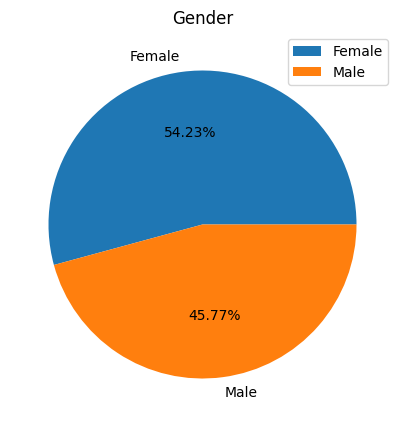

In [135]:
label=['Female','Male']
y=df['Gender'].value_counts()
plt.pie(y,labels=label,autopct='%1.2f%%')
plt.title('Gender')
plt.legend()
plt.show()

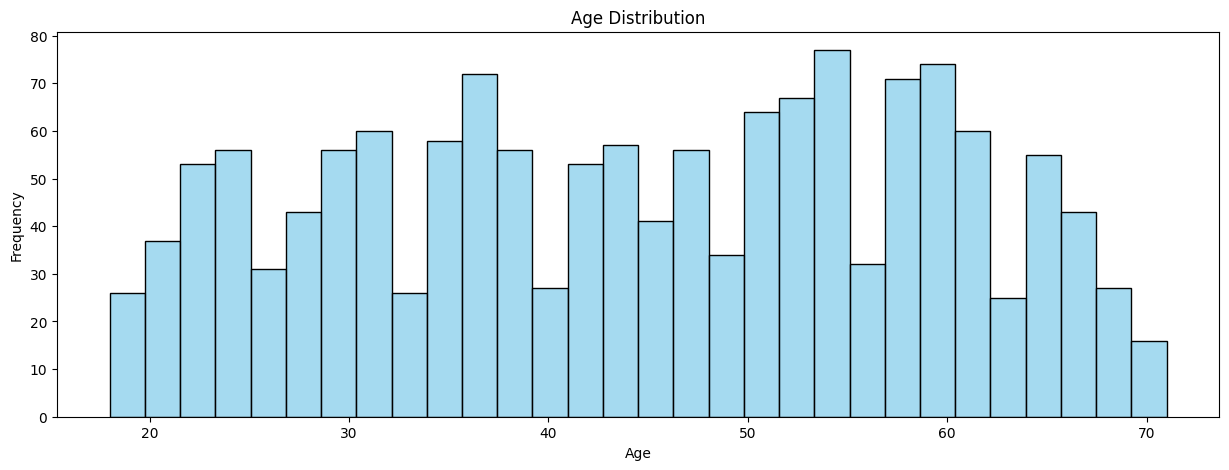

In [136]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.histplot(df['Age'], bins=30, kde=False, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

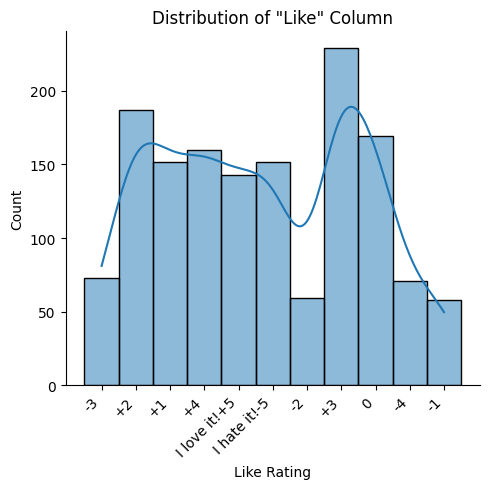

In [137]:
sns.displot(df['Like'], kde=True)
plt.title('Distribution of "Like" Column')
plt.xlabel('Like Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Segment Separation Plot

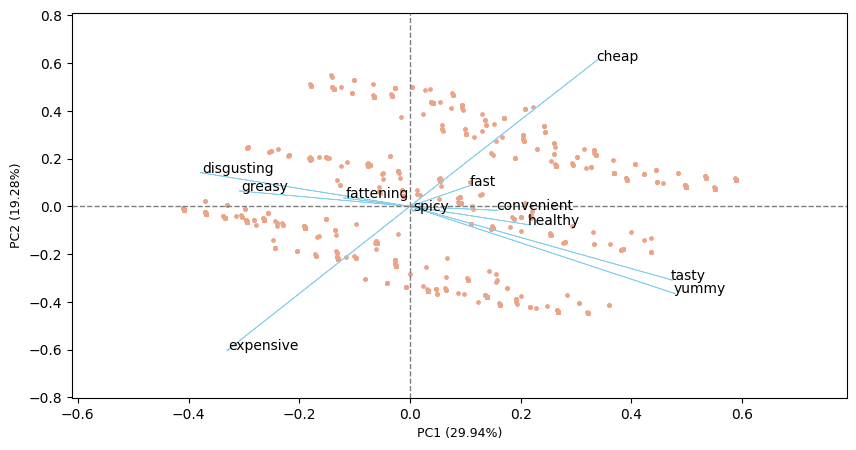

In [138]:
# PCA Biplot
from bioinfokit.visuz import cluster
cluster.biplot(cscore=pc, loadings=-loadings, labels=df.columns.values[0:11], var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

### K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

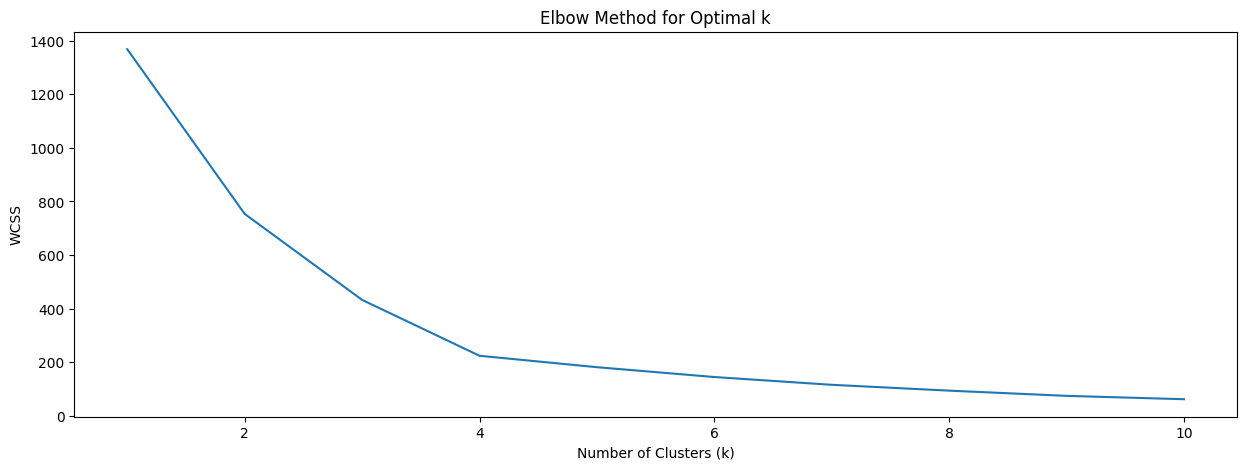

In [139]:
from sklearn.cluster import KMeans

kmeans_input = pc_df[['PC1', 'PC2']]

#determining the k value using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(kmeans_input)
    wcss.append(kmeans.inertia_)

#plotting elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


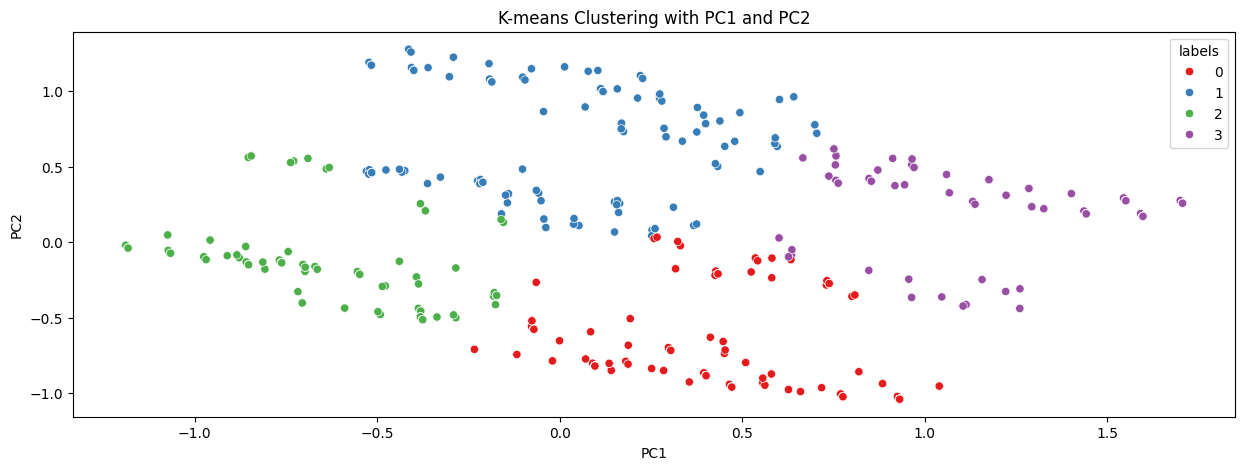

In [140]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans = kmeans.fit(kmeans_input)

#cluster labels
labels = pd.DataFrame(kmeans.labels_, columns=['labels'])
kmeans_df = kmeans_input.join(labels, lsuffix='drop')
kmeans_df = kmeans_df[[h for h in list(kmeans_df) if 'drop' not in h]]

#scatter plot of clusters
sns.scatterplot(x="PC1", y="PC2", hue='labels', data=kmeans_df, palette='Set1')
plt.title('K-means Clustering with PC1 and PC2')
plt.show()

### Centroid Analysis

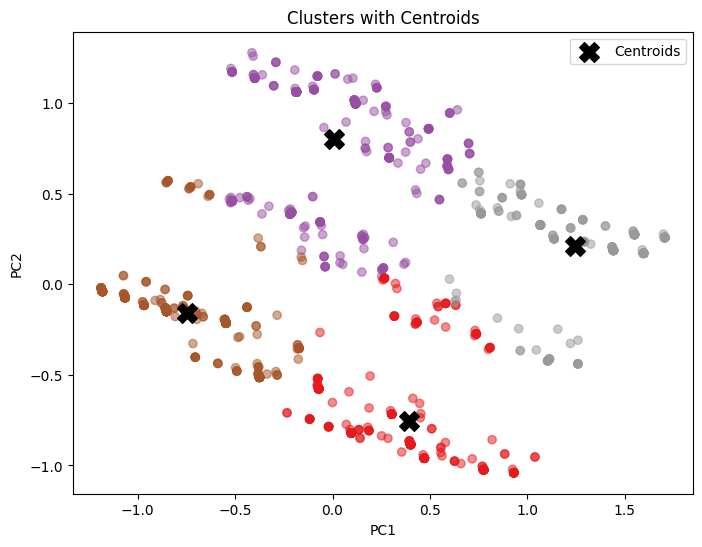

        PC1       PC2  Cluster
0  0.391723 -0.754651        0
1  0.005114  0.805332        1
2 -0.747455 -0.158893        2
3  1.245309  0.213359        3


In [141]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
centroids['Cluster'] = range(len(centroids))

# Centroid Analysis
plt.figure(figsize=(8, 6))
plt.scatter(kmeans_input['PC1'], kmeans_input['PC2'], c=kmeans.labels_, cmap='Set1', alpha=0.5)
plt.scatter(centroids['PC1'], centroids['PC2'], s=200, c='black', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

print(centroids)

### Market Segment Profiling and Target selection

In [142]:
kmeans_df['Cluster'] = kmeans_df['labels']

# Summary statistics by cluster
cluster_summary = kmeans_df.groupby('Cluster').agg({
    'PC1': ['mean', 'std', 'min', 'max'],
    'PC2': ['mean', 'std', 'min', 'max']
}).reset_index()

print(cluster_summary)

  Cluster       PC1                                     PC2            \
               mean       std       min       max      mean       std   
0       0  0.391723  0.314707 -0.233617  1.039346 -0.754651  0.277202   
1       1  0.005114  0.312691 -0.529437  0.703975  0.805332  0.326738   
2       2 -0.747455  0.270173 -1.188421 -0.154234 -0.158893  0.185712   
3       3  1.245309  0.315904  0.600575  1.705573  0.213359  0.247374   

                       
        min       max  
0 -1.040274  0.033747  
1  0.043209  1.279130  
2 -0.513047  0.572063  
3 -0.438988  0.618619  


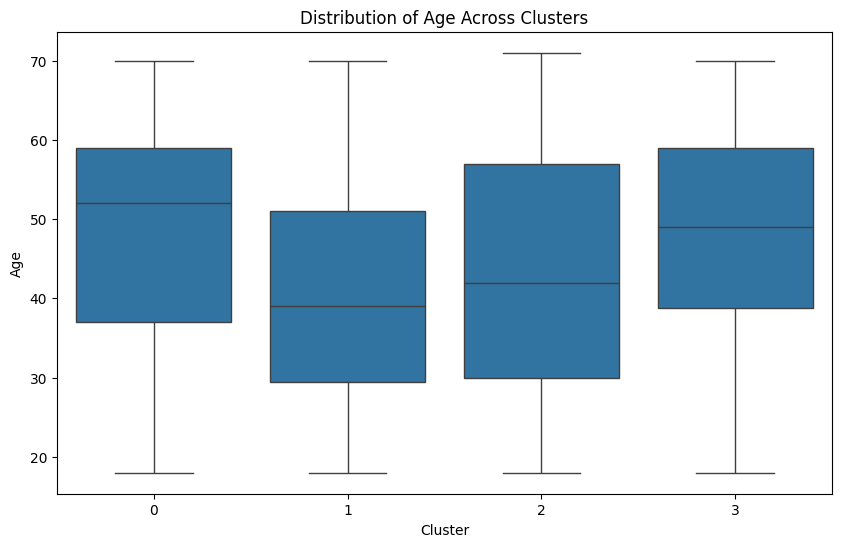

In [143]:
import matplotlib.pyplot as plt
df['Cluster'] = kmeans.labels_

#distribution of age across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Distribution of Age Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

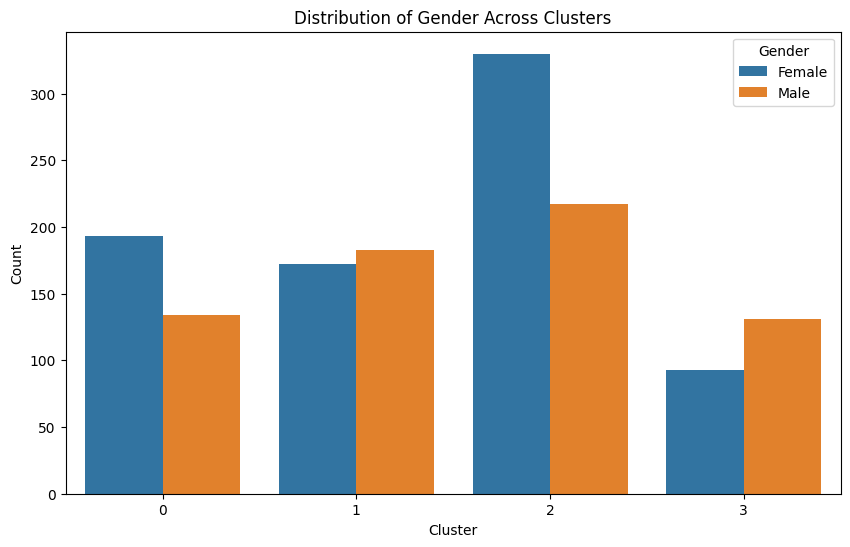

In [144]:
import matplotlib.pyplot as plt
#distribution of gender across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=df)
plt.title('Distribution of Gender Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

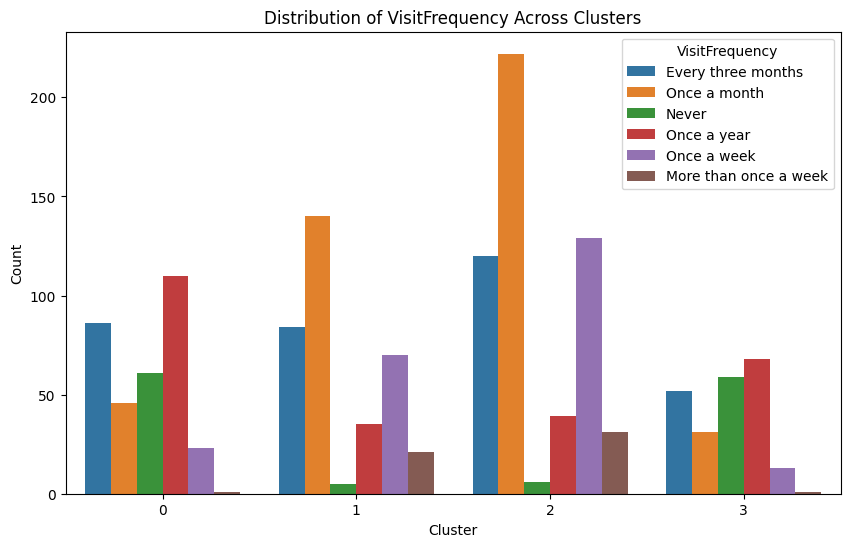

In [145]:
import matplotlib.pyplot as plt
#distribution of VisitFrequency across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='VisitFrequency', data=df)
plt.title('Distribution of VisitFrequency Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()